In [1]:
import astropy.io.fits as fits
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import treecorr
import matplotlib.pyplot as plt
import healpy as hp


In [2]:
# Load only necessary columns from the galaxy shape catalogue
shape_cat_path = '/n17data/mkilbing/astro/data/CFIS/v1.x/ShapePipe/v1.5.x/v1.5.3/unions_shapepipe_cut_struc_2024_v1.5.3.fits'
shapes = fits.open(shape_cat_path)[1].data


In [3]:
len( shapes )

143256658

In [4]:
eboss_ngc = fits.open('/n17data/murray/eboss_data/eBOSS_LRGpCMASS_clustering_data-NGC-vDR16.fits')[1].data
eboss_sgc = fits.open('/n17data/murray/eboss_data/eBOSS_LRGpCMASS_clustering_data-SGC-vDR16.fits')[1].data

In [5]:
len( eboss_ngc ) , len( eboss_sgc )

(255741, 121717)

In [6]:
# Combine the DESI north and south galaxy catalogues
galaxies = np.concatenate((eboss_ngc, eboss_sgc))

# Check the length of the combined catalogue
len(galaxies)

377458

In [7]:
eboss_rec_ngc = fits.open('/n17data/murray/eboss_data/eBOSS_LRGpCMASS_clustering_data_rec-NGC-vDR16.fits')[1].data
eboss_rec_sgc = fits.open('/n17data/murray/eboss_data/eBOSS_LRGpCMASS_clustering_data_rec-SGC-vDR16.fits')[1].data

In [8]:
# Combine the DESI north and south galaxy catalogues
galaxies_rec = np.concatenate((eboss_rec_ngc, eboss_rec_sgc))

# Check the length of the combined catalogue
len(galaxies_rec)

377458

In [9]:
galaxies['ISCMASS']

array([70, 70, 70, ..., 84, 84, 84], dtype=int8)

In [10]:
galaxies[ galaxies['LRG_ID'] == 999999 ]

array([(123.63148543, 44.68493718, 0.61538965, nan, 0.99118322, 1., 1., 0.0002697 , 999999, 84, 0.99118322, 84, 4214., 0.35245922, 0.27048638),
       (125.66221172, 46.50409671, 0.63970435, nan, 0.99394041, 1., 1., 0.00022762, 999999, 84, 0.99394041, 84,  525., 0.437921  , 0.30522822),
       (125.85139665, 46.6304805 , 0.62236786, nan, 0.98724449, 1., 1., 0.00024053, 999999, 84, 0.98724449, 84,  523., 0.37845442, 0.29365943),
       ...,
       (317.66469376,  2.62232396, 0.60335726, nan, 1.13564956, 1., 1., 0.00030149, 999999, 84, 1.13564956, 84, 5250., 0.3159417 , 0.24907123),
       (317.94039405,  2.56658207, 0.60223174, nan, 1.18841493, 1., 1., 0.00030149, 999999, 84, 1.18841493, 84, 5250., 0.31144565, 0.24907123),
       (318.41612629,  2.76482679, 0.66893709, nan, 1.30562758, 1., 1., 0.00018477, 999999, 84, 1.30562758, 84, 6303., 0.5430602 , 0.35116584)],
      dtype=[('RA', '<f8'), ('DEC', '<f8'), ('Z', '<f8'), ('WEIGHT_FKP_EBOSS', '<f8'), ('WEIGHT_SYSTOT', '<f8'), ('WEIGHT_C

In [11]:

randoms_ngc = fits.open('/n17data/murray/eboss_data/eBOSS_LRGpCMASS_clustering_random-NGC-vDR16.fits')[1].data
randoms_sgc = fits.open('/n17data/murray/eboss_data/eBOSS_LRGpCMASS_clustering_random-SGC-vDR16.fits')[1].data

In [12]:
# Combine the DESI north and south galaxy catalogues
randoms = np.concatenate((randoms_ngc, randoms_sgc))

# Check the length of the combined catalogue
len(randoms)

19245852

In [13]:

randoms_rec_ngc = fits.open('/n17data/murray/eboss_data/eBOSS_LRGpCMASS_clustering_random_rec-NGC-vDR16.fits')[1].data
randoms_rec_sgc = fits.open('/n17data/murray/eboss_data/eBOSS_LRGpCMASS_clustering_random_rec-SGC-vDR16.fits')[1].data

In [14]:
# Combine the DESI north and south galaxy catalogues
randoms_rec = np.concatenate((randoms_rec_ngc, randoms_rec_sgc))

# Check the length of the combined catalogue
len(randoms_rec)

19245852

In [15]:
# Create SkyCoord objects for matching
galaxy_coords = coord.SkyCoord(ra=galaxies['RA']*u.degree, dec=galaxies['DEC']*u.degree)
shape_coords = coord.SkyCoord(ra=shapes['RA']*u.degree, dec=shapes['Dec']*u.degree)

# Perform the matching
idx, d2d, d3d = galaxy_coords.match_to_catalog_sky(shape_coords)

# Apply a maximum separation criterion (e.g., 1 arcsecond)
max_sep = 1 * u.arcsec
matches = d2d < max_sep

KeyboardInterrupt: 

In [ ]:
len( galaxies_rec['RA'][matches] )

136614

In [ ]:
len( galaxies['RA'][matches] )

136614

In [ ]:
# Filter the matched catalogues
matched_galaxy_ra = galaxies['RA'][matches]
matched_galaxy_dec = galaxies['DEC'][matches]
matched_galaxy_redshift = galaxies['Z'][matches]
matched_shape_e1 = shapes['e1'][idx[matches]]
matched_shape_e2 = shapes['e2'][idx[matches]]
matched_shape_w = shapes['w_iv'][idx[matches]]

In [ ]:
# Filter the matched catalogues
matched_galaxy_rec_ra = galaxies_rec['RA'][matches]
matched_galaxy_rec_dec = galaxies_rec['DEC'][matches]
matched_galaxy_rec_redshift = galaxies_rec['Z'][matches]
matched_shape_rec_e1 = shapes['e1'][idx[matches]]
matched_shape_rec_e2 = shapes['e2'][idx[matches]]
matched_shape_rec_w = shapes['w_iv'][idx[matches]]

In [ ]:
# Create a new FITS table with the matched columns
cols = [
    fits.Column(name='RA', format='E', array=matched_galaxy_ra),
    fits.Column(name='Dec', format='E', array=matched_galaxy_dec),
    fits.Column(name='e1', format='E', array=matched_shape_e1),
    fits.Column(name='e2', format='E', array=matched_shape_e2),
    fits.Column(name='w_iv', format='E', array=matched_shape_w),
    fits.Column(name='redshift', format='E', array=matched_galaxy_redshift)
]

hdu = fits.BinTableHDU.from_columns(cols)
hdu.writeto('unions_eboss_lrgpcmass_catalogue.fits', overwrite=True)

In [ ]:
# Create a new FITS table with the matched columns
cols = [
    fits.Column(name='RA', format='E', array=matched_galaxy_rec_ra),
    fits.Column(name='Dec', format='E', array=matched_galaxy_rec_dec),
    fits.Column(name='e1', format='E', array=matched_shape_rec_e1),
    fits.Column(name='e2', format='E', array=matched_shape_rec_e2),
    fits.Column(name='w_iv', format='E', array=matched_shape_rec_w),
    fits.Column(name='redshift', format='E', array=matched_galaxy_rec_redshift)
]

hdu = fits.BinTableHDU.from_columns(cols)
hdu.writeto('unions_eboss_lrgpcmass_rec_catalogue.fits', overwrite=True)

In [15]:
theta_bins = np.linspace( 0 , 5 , 100 )
theta_cents = ( theta_bins[1:] + theta_bins[:-1] )/2.
counts, _ = np.histogram( d2d.arcsec[ d2d.arcsec < 5 ] , bins = theta_bins )

NameError: name 'd2d' is not defined

In [16]:
# Plot the histogram
plt.plot( theta_cents , counts )
plt.xlabel('Separation (arcseconds)')
plt.ylabel('Number of Matches')
plt.title('Histogram of Separations Between Catalogues')
plt.show()

NameError: name 'counts' is not defined

In [15]:
shape_position_catalogue = fits.open('unions_eboss_lrgpcmass_catalogue.fits')[1].data
shape_position_rec_catalogue = fits.open('unions_eboss_lrgpcmass_rec_catalogue.fits')[1].data

In [16]:
np.min( 1/shape_position_catalogue['w_iv'] )

0.030425541

(array([4.0000e+00, 1.1100e+02, 2.5120e+03, 5.3420e+03, 6.0710e+03,
        8.1310e+03, 1.1782e+04, 1.1896e+04, 2.1603e+04, 3.2226e+04,
        2.3756e+04, 5.5060e+03, 2.3970e+03, 1.7830e+03, 7.6300e+02,
        1.8200e+02, 3.9400e+02, 2.4000e+02, 2.7500e+02, 2.3000e+02,
        2.3900e+02, 1.0700e+02, 1.6000e+02, 3.0000e+00, 1.4800e+02,
        5.7000e+01, 0.0000e+00, 5.1000e+01, 7.7000e+01, 0.0000e+00,
        5.9000e+01, 8.2000e+01, 8.4000e+01, 3.9000e+01, 4.5000e+01,
        0.0000e+00, 3.5000e+01, 0.0000e+00, 1.7000e+01, 2.3000e+01,
        5.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+01, 9.0000e+00, 1.4000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.4000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+01,
        0.0000e+00, 0.0000e+00, 8.0000e+00, 9.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01,
        0.0000e+00, 0.0000e+00, 1.0000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

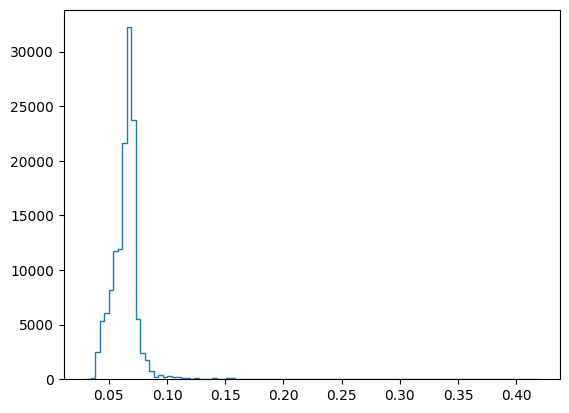

In [17]:
plt.hist( 1/shape_position_catalogue['w_iv'] , bins = 100 , histtype = 'step' , label = 'Catalogue' )

In [18]:
len( shape_position_catalogue )

136614

In [19]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM( 70 , 0.3 )

In [20]:
ra = 'Ra'
dec = 'DEC'
redshift = 'redshift'

In [21]:
import healpy as hp

In [22]:
# remove random shapes and positions outside of the survey footprints
# Convert RA, Dec to HEALPix pixel indices
nside = 128
pixels_positions = hp.ang2pix(nside, galaxies['RA'], galaxies['DEC'] , lonlat=True)
pixels_shapes = hp.ang2pix(nside,  shape_position_catalogue[ra], shape_position_catalogue[dec] , lonlat=True)
pixels_positions_rec = hp.ang2pix(nside, galaxies_rec['RA'], galaxies_rec['DEC'] , lonlat=True)
#pixels_unions_shapes = hp.ang2pix(nside,  shapes['Ra'], shapes['Dec'] , lonlat=True)
pixels_random_positions = hp.ang2pix(nside,  randoms['RA'], randoms['DEC'] , lonlat=True)

# Create HEALPix count maps
position_map = np.bincount(pixels_positions, minlength=hp.nside2npix(nside))
shape_map = np.bincount(pixels_shapes, minlength=hp.nside2npix(nside))
position_rec_map = np.bincount(pixels_positions_rec, minlength=hp.nside2npix(nside))

#unions_shape_map = np.bincount(pixels_unions_shapes, minlength=hp.nside2npix(nside))
random_position_map = np.bincount(pixels_random_positions, minlength=hp.nside2npix(nside))

# Create a mask: pixels with at least one object
position_mask = (position_map > 0) 
shape_mask = (shape_map>0) 

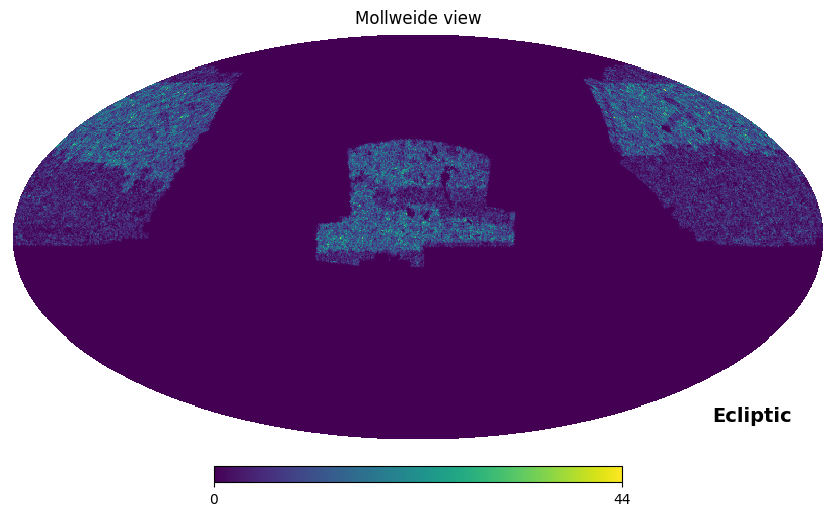

In [23]:
hp.mollview( position_map , coord ='E' )

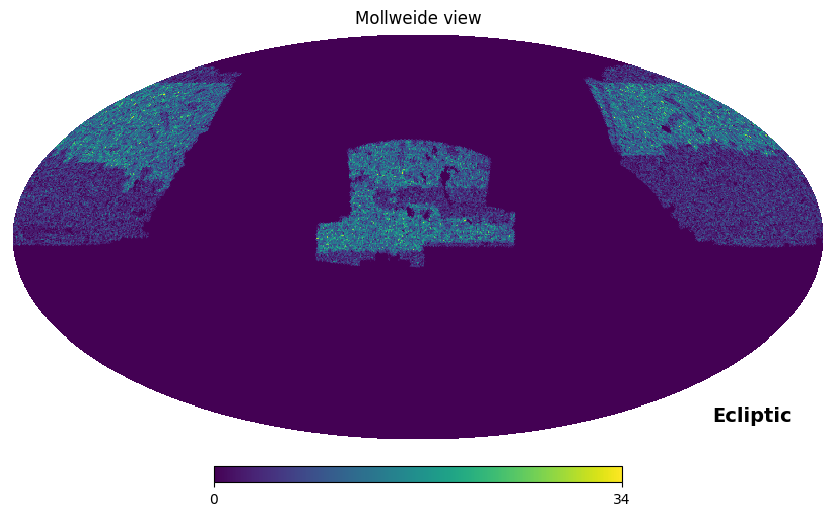

In [24]:
hp.mollview( position_rec_map , coord ='E' )

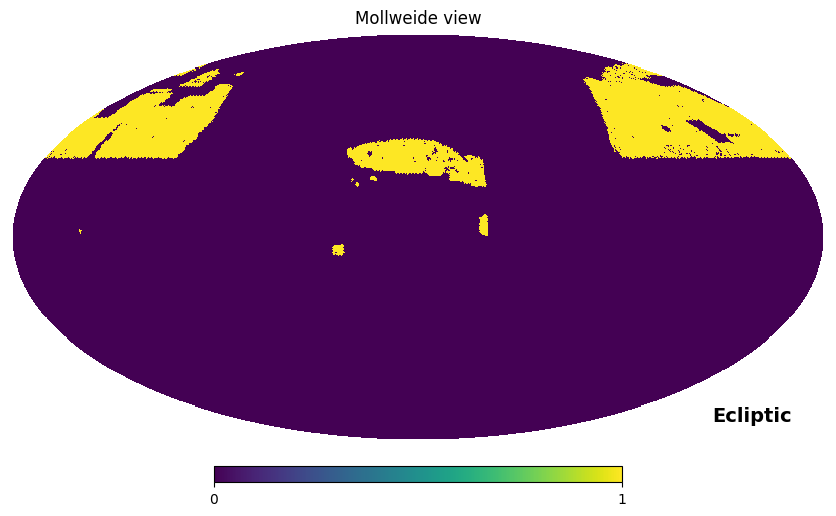

In [25]:
hp.mollview( shape_mask , coord ='E' )

In [26]:
# hp.mollview( unions_shape_map, coord ='E' )

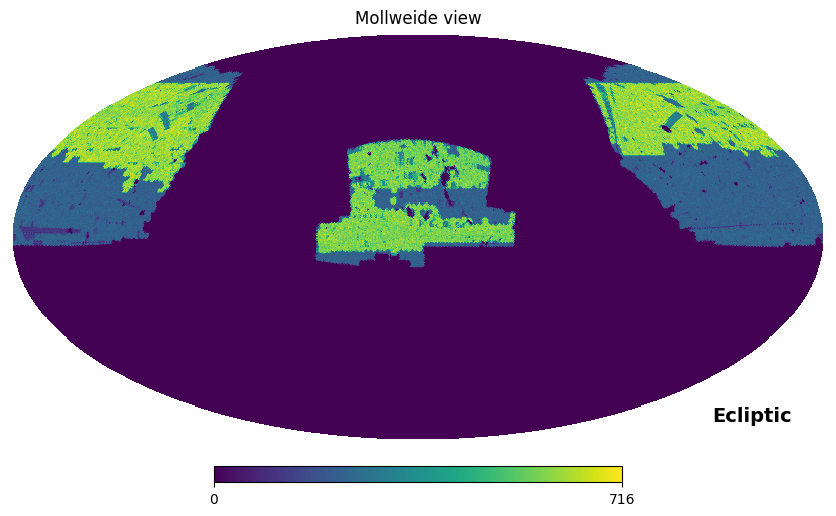

In [27]:
hp.mollview( random_position_map , coord ='E' )

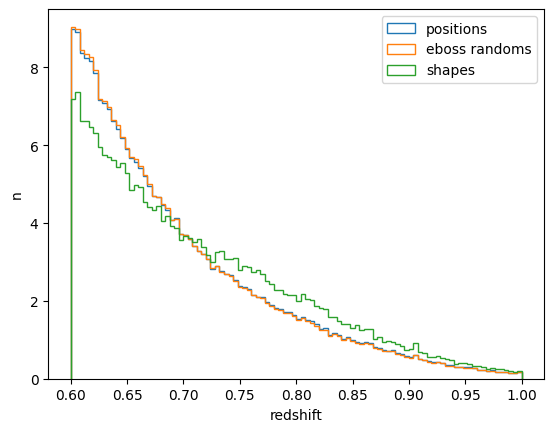

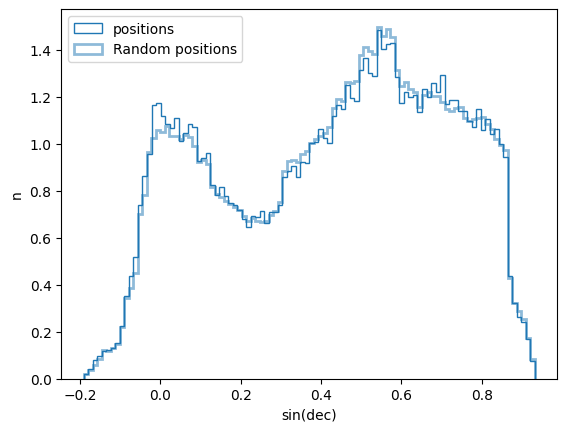

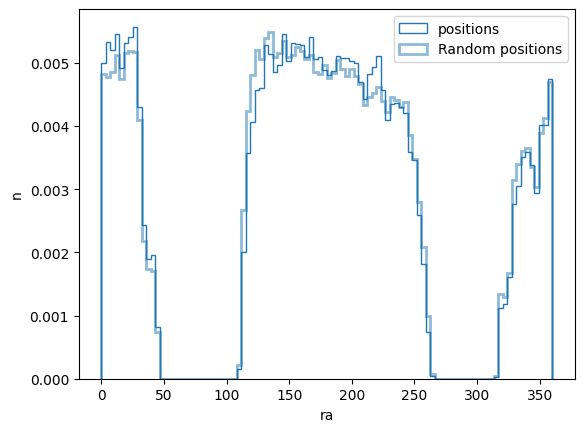

In [28]:
plt.figure()
plt.hist( galaxies['Z'] ,100,histtype='step',density=True,label='positions')
plt.hist( randoms['Z'] ,100,histtype='step',density=True,label='eboss randoms')
plt.hist( shape_position_catalogue['redshift'],100,histtype='step',density=True,label='shapes')
# plt.hist(random_positions[redshift],100,histtype='step',density=True,label='Random positions',lw=2,alpha=0.5,color='C0')
# plt.hist(random_shapes[redshift],100,histtype='step',density=True,label='Random shapes',lw=2,alpha=0.5,color='C1')
plt.xlabel('redshift')
plt.ylabel('n')
plt.legend()


plt.figure()
plt.hist(np.sin(np.deg2rad(galaxies['DEC'])),100,histtype='step',density=True,label='positions')
#plt.hist(np.sin(np.deg2rad(shape_position_catalogue['Dec'])),100,histtype='step',density=True,label='shapes')
plt.hist(np.sin(np.deg2rad(randoms['DEC'])),100,histtype='step',density=True,label='Random positions',lw=2,alpha=0.5,color='C0')
plt.xlabel('sin(dec)')
plt.ylabel('n')
plt.legend()

plt.figure()
plt.hist(galaxies['RA'],100,histtype='step',density=True,label='positions')
#plt.hist(shape_position_catalogue['RA'],100,histtype='step',density=True,label='shapes')
plt.hist(randoms['RA'],100,histtype='step',density=True,label='Random positions',lw=2,alpha=0.5,color='C0')
plt.xlabel('ra')
plt.ylabel('n')
plt.legend()

In [29]:
import pandas as pd

In [30]:
galaxies

array([(117.42862144, 16.0234498 , 0.642036  , 0.51224016, 1.2675984 , 1., 1.05162796, 0.00021434,  94137, 70, 1.33304192, 84, 6668.,        nan, 0.31812295),
       (134.59823494, 16.02154128, 0.73537641, 0.52343664, 1.02396222, 1., 1.00404474, 0.00011214,  94274, 70, 1.02810387, 84, 6524.,        nan, 0.47137941),
       (118.30510466, 16.08361655, 0.66308333, 0.5056422 , 1.18549052, 1., 1.05772796, 0.00018443,  94371, 70, 1.25392647, 84, 6668.,        nan, 0.35157546),
       ...,
       (317.66469376,  2.62232396, 0.60335726,        nan, 1.13564956, 1., 1.        , 0.00030149, 999999, 84, 1.13564956, 84, 5250., 0.3159417 , 0.24907123),
       (317.94039405,  2.56658207, 0.60223174,        nan, 1.18841493, 1., 1.        , 0.00030149, 999999, 84, 1.18841493, 84, 5250., 0.31144565, 0.24907123),
       (318.41612629,  2.76482679, 0.66893709,        nan, 1.30562758, 1., 1.        , 0.00018477, 999999, 84, 1.30562758, 84, 6303., 0.5430602 , 0.35116584)],
      dtype=[('RA', '<f8'), ('DEC

In [31]:
# Extract only 1D columns from the galaxy sample
columns_to_use = ['RA', 'DEC', 'Z',  'WEIGHT_ALL_NOFKP']
positions = pd.DataFrame({col: galaxies[col] for col in columns_to_use})
positions_rec = pd.DataFrame({col: galaxies_rec[col] for col in columns_to_use})

In [32]:
# Create the DataFrame
shapes = pd.DataFrame.from_records( shape_position_catalogue )
shapes_rec = pd.DataFrame.from_records( shape_position_rec_catalogue )

In [33]:
random_positions = pd.DataFrame.from_records( randoms )
random_positions_rec = pd.DataFrame.from_records( randoms_rec )

In [34]:
len( random_positions ) / len( shapes )

140.87759673239933

In [35]:
random_positions = random_positions.iloc[::3].copy()
random_positions_rec = random_positions_rec.iloc[::3].copy()

In [36]:
positions.shape, shapes.shape, random_positions.shape

((377458, 4), (136614, 6), (6415284, 14))

In [37]:
positions[redshift] = positions['Z']
positions['w'] = np.ones( len( positions ))

positions_rec[redshift] = positions_rec['Z']
positions_rec['w'] = np.ones( len( positions_rec ))

shapes['w'] = shapes['w_iv']
shapes['DEC'] = shapes['Dec']

shapes_rec['w'] = shapes_rec['w_iv']
shapes_rec['DEC'] = shapes_rec['Dec']

random_positions[redshift] = random_positions['Z']
random_positions_rec[redshift] = random_positions_rec['Z']


In [38]:
len( randoms ) / len( random_positions )

3.0

In [39]:
 len( random_positions ) / len( shapes ) 

46.95919891079977

In [40]:
d = 'd'

positions.loc[:,d] = cosmo.comoving_distance(positions[redshift]).value
positions_rec.loc[:,d] = cosmo.comoving_distance(positions_rec[redshift]).value

shapes.loc[:,d] = cosmo.comoving_distance(shapes[redshift]).value
shapes_rec.loc[:,d] = cosmo.comoving_distance(shapes_rec[redshift]).value

random_positions[d] = cosmo.comoving_distance(random_positions[redshift]).value
random_positions_rec[d] = cosmo.comoving_distance(random_positions_rec[redshift]).value

In [42]:
np.min( positions['d'])

2206.3711946107605

In [43]:
positions['x'] = positions[d]*np.cos(np.deg2rad(positions['DEC']))*np.cos(np.deg2rad(positions['RA']))
positions['y'] = positions[d]*np.cos(np.deg2rad(positions['DEC']))*np.sin(np.deg2rad(positions['RA']))
positions['z'] = positions[d]*np.sin(np.deg2rad(positions['DEC']))

positions_rec['x'] = positions_rec[d]*np.cos(np.deg2rad(positions_rec['DEC']))*np.cos(np.deg2rad(positions_rec['RA']))
positions_rec['y'] = positions_rec[d]*np.cos(np.deg2rad(positions_rec['DEC']))*np.sin(np.deg2rad(positions_rec['RA']))
positions_rec['z'] = positions_rec[d]*np.sin(np.deg2rad(positions_rec['DEC']))

shapes['x'] = shapes[d]*np.cos(np.deg2rad(shapes['DEC']))*np.cos(np.deg2rad(shapes['RA']))
shapes['y'] = shapes[d]*np.cos(np.deg2rad(shapes['DEC']))*np.sin(np.deg2rad(shapes['RA']))
shapes['z'] = shapes[d]*np.sin(np.deg2rad(shapes['DEC']))

shapes_rec['x'] = shapes_rec[d]*np.cos(np.deg2rad(shapes_rec['DEC']))*np.cos(np.deg2rad(shapes_rec['RA']))
shapes_rec['y'] = shapes_rec[d]*np.cos(np.deg2rad(shapes_rec['DEC']))*np.sin(np.deg2rad(shapes_rec['RA']))
shapes_rec['z'] = shapes_rec[d]*np.sin(np.deg2rad(shapes_rec['DEC']))

In [44]:
dist = np.sqrt( ( positions['x'] - positions_rec['x'] )**2 + ( positions['y'] - positions_rec['y'] )**2 + ( positions['z'] - positions_rec['z'] )**2 )

In [45]:
np.max( dist )

140.73763109931056

In [46]:
# Calculate the histogram
d_bins = np.linspace(0, 140, 100)
d_cents = (d_bins[1:] + d_bins[:-1]) / 2
d_counts, _ = np.histogram(dist, bins=d_bins)

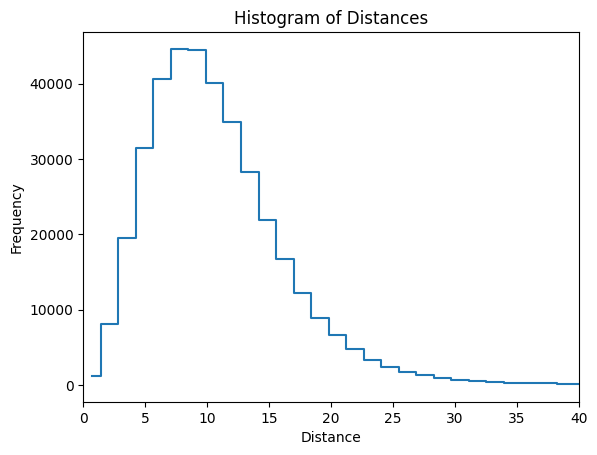

In [47]:
# Plot the histogram
plt.plot(d_cents , d_counts, drawstyle='steps-mid')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances')
plt.xlim( 0 , 40 )
plt.show()

In [48]:
dz = positions[redshift] - positions_rec[redshift]

In [49]:
np.max( dz ), np.min( dz )

(0.050399574843483674, -0.052563508835394845)

In [50]:
# Calculate the histogram
dz_bins = np.linspace( -0.05, 0.05, 100)
dz_cents = (dz_bins[1:] + dz_bins[:-1]) / 2
dz_counts, _ = np.histogram(dz, bins=dz_bins)

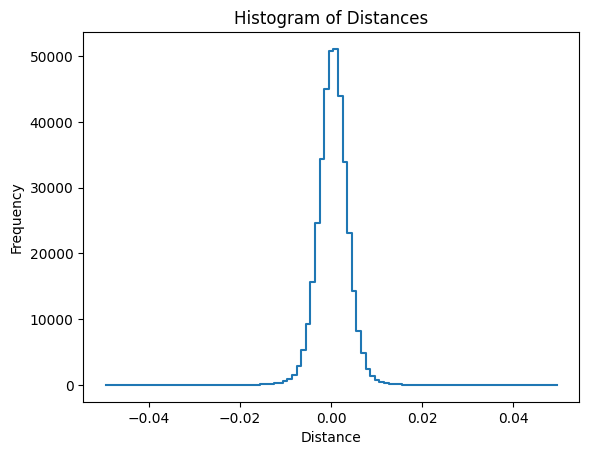

In [51]:
# Plot the histogram
plt.plot(dz_cents , dz_counts, drawstyle='steps-mid')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances')
plt.show()

In [52]:
dtheta = np.sqrt( ( shapes['RA'] - shapes_rec['RA'] )**2 + ( shapes['DEC'] - shapes_rec['DEC'] )**2 )

In [53]:
np.min( dtheta ), np.max( dtheta )

(0.00020542773, 359.98804)

In [54]:
# Calculate the histogram
dtheta_bins = np.linspace( 0 , 1 , 100)
dtheta_cents = (dtheta_bins[1:] + dtheta_bins[:-1]) / 2
dtheta_counts, _ = np.histogram(dtheta, bins=dtheta_bins)

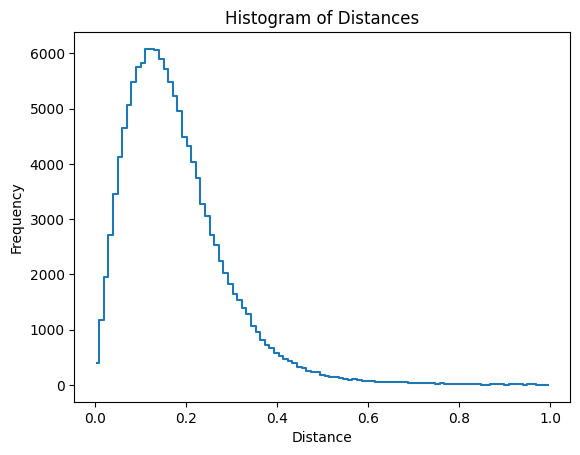

In [55]:
# Plot the histogram
plt.plot(dtheta_cents , dtheta_counts, drawstyle='steps-mid')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances')
plt.show()

In [56]:
position_catalogue = treecorr.Catalog( x=positions['x'], 
                                       y=positions['y'], 
                                       z=positions['z'],
                                       w=positions['w'])
shape_catalogue = treecorr.Catalog( x=shapes['x'], 
                                    y=shapes['y'], 
                                    z=shapes['z'], 
                                    g1 = shapes['e1'],
                                    g2 = shapes['e2'], 
                                    w=shapes['w'])


In [57]:
position_rec_catalogue = treecorr.Catalog( x=positions_rec['x'], 
                                       y=positions_rec['y'], 
                                       z=positions_rec['z'],
                                       w=positions_rec['w'])
shape_rec_catalogue = treecorr.Catalog( x=shapes_rec['x'], 
                                    y=shapes_rec['y'], 
                                    z=shapes_rec['z'], 
                                    g1 = shapes_rec['e1'],
                                    g2 = shapes_rec['e2'], 
                                    w=shapes_rec['w'])

In [58]:
random_positions['x'] = random_positions[d]*np.cos(np.deg2rad(random_positions['DEC']))*np.cos(np.deg2rad(random_positions['RA']))
random_positions['y'] = random_positions[d]*np.cos(np.deg2rad(random_positions['DEC']))*np.sin(np.deg2rad(random_positions['RA']))
random_positions['z'] = random_positions[d]*np.sin(np.deg2rad(random_positions['DEC']))

random_positions_rec['x'] = random_positions_rec[d]*np.cos(np.deg2rad(random_positions_rec['DEC']))*np.cos(np.deg2rad(random_positions_rec['RA']))
random_positions_rec['y'] = random_positions_rec[d]*np.cos(np.deg2rad(random_positions_rec['DEC']))*np.sin(np.deg2rad(random_positions_rec['RA']))
random_positions_rec['z'] = random_positions_rec[d]*np.sin(np.deg2rad(random_positions_rec['DEC']))



In [59]:
random_position_catalogue = treecorr.Catalog( x=random_positions['x'], 
                                              y=random_positions['y'], 
                                              z=random_positions['z'])

random_position_rec_catalogue = treecorr.Catalog( x=random_positions_rec['x'], 
                                              y=random_positions_rec['y'], 
                                              z=random_positions_rec['z'])

In [60]:
# Shear stuff
# Function to process a single rpar bin
def process_ng_rpar_bin( shape_catalogue , position_catalogue , random_position_catalogue , 
                          min_rpar, max_rpar , min_sep, max_sep, nbins , bin_type = 'Linear' ):
    print('Running between rpar =', min_rpar, 'and rpar =', max_rpar)

    # Create the NNCorrelation objects
    ng = treecorr.NGCorrelation(min_sep=min_sep,
                                max_sep=max_sep, 
                                nbins=nbins,
                                min_rpar=min_rpar, max_rpar=max_rpar, bin_type=bin_type) 
    rg = treecorr.NGCorrelation(min_sep=min_sep,
                                max_sep=max_sep, 
                                nbins=nbins, 
                                min_rpar=min_rpar, max_rpar=max_rpar, bin_type=bin_type) 

    # Process the position and random catalogues
    ng.process(position_catalogue, shape_catalogue , metric='Rperp')
    rg.process(random_position_catalogue, shape_catalogue, metric='Rperp')

    # Calculate the Landy-Szalay estimator
    xi_p , xi_x , _ = ng.calculateXi( rg = rg )
    r = np.exp(ng.meanlogr)

    return r , xi_p , xi_x

In [61]:
# Define the range and number of bins for rpar
rpar_bins = np.linspace(-200, 200, 201 )  

# Define the parameters for the correlation function
min_sep = 0.5  # Minimum separation in Mpc
max_sep = 200  # Maximum separation in Mpc
nbins = 100     # Number of bins
bin_slop = 0.1 # Bin slop

In [62]:
bin_type = 'Linear'
w_nbins = 25
min_r = 60

r , w_xi_p , w_xi_x = process_ng_rpar_bin( shape_catalogue ,
                                           position_catalogue , 
                                           random_position_catalogue ,
                                           -min_r, min_r , 
                                            min_sep , max_sep , w_nbins , bin_type= bin_type )
r , w_xi_p_rec , w_xi_x_rec = process_ng_rpar_bin( shape_rec_catalogue ,
                                                   position_rec_catalogue ,
                                                   random_position_rec_catalogue ,
                                                   -min_r, min_r , 
                                                   min_sep , max_sep , w_nbins , bin_type= bin_type )

Running between rpar = -60 and rpar = 60
Running between rpar = -60 and rpar = 60


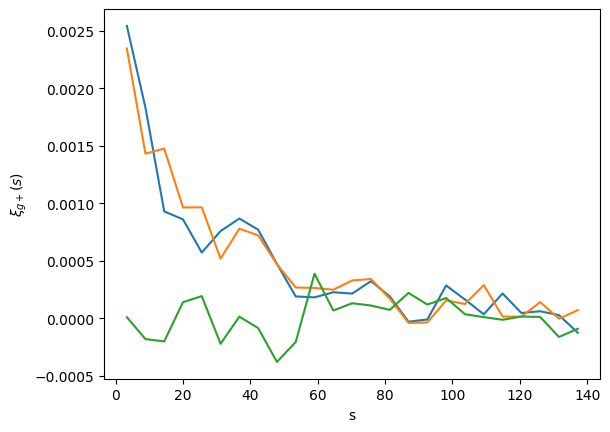

In [63]:
h = 0.7
plt.plot( r  * h, -w_xi_p )
plt.plot( r  * h, -w_xi_p_rec )
plt.plot( r  * h, -w_xi_x )
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('s')
plt.ylabel(r'$\xi_{g+}(s)$')
plt.show()

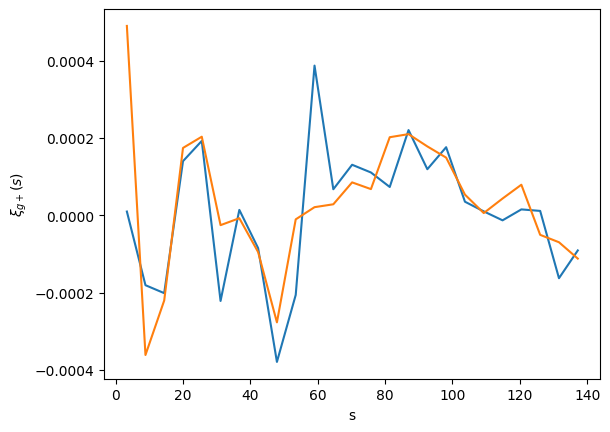

In [64]:
h = 0.7
plt.plot( r  * h, -w_xi_x )
plt.plot( r  * h, -w_xi_x_rec )
#plt.plot( r  * h, -w_xi_x )
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('s')
plt.ylabel(r'$\xi_{g+}(s)$')
plt.show()

In [ ]:
# Initialize lists to store results
xi_gn_p_results = []
xi_gn_x_results = []
r_results = []

# Iterate over rpar bins
for i in range(len(rpar_bins) - 1):

    min_rpar = rpar_bins[i]
    max_rpar = rpar_bins[i + 1]

    r , xi_p , xi_x = process_ng_rpar_bin( shape_catalogue , position_catalogue , random_position_catalogue  , min_rpar, max_rpar , min_sep , max_sep , nbins )

    # Store the results
    xi_gn_p_results.append( xi_p )
    xi_gn_x_results.append( xi_x )
    r_results.append(r)

Running between rpar = -200.0 and rpar = -198.0
Running between rpar = -198.0 and rpar = -196.0
Running between rpar = -196.0 and rpar = -194.0


Running between rpar = -194.0 and rpar = -192.0
Running between rpar = -192.0 and rpar = -190.0
Running between rpar = -190.0 and rpar = -188.0
Running between rpar = -188.0 and rpar = -186.0
Running between rpar = -186.0 and rpar = -184.0
Running between rpar = -184.0 and rpar = -182.0
Running between rpar = -182.0 and rpar = -180.0
Running between rpar = -180.0 and rpar = -178.0
Running between rpar = -178.0 and rpar = -176.0
Running between rpar = -176.0 and rpar = -174.0
Running between rpar = -174.0 and rpar = -172.0
Running between rpar = -172.0 and rpar = -170.0
Running between rpar = -170.0 and rpar = -168.0
Running between rpar = -168.0 and rpar = -166.0
Running between rpar = -166.0 and rpar = -164.0
Running between rpar = -164.0 and rpar = -162.0
Running between rpar = -162.0 and rpar = -160.0
Running between rpar = -160.0 and rpar = -158.0
Running between rpar = -158.0 and rpar = -156.0
Running between rpar = -156.0 and rpar = -154.0
Running between rpar = -154.0 and rpar =

In [ ]:
xi_gn_p_results = np.array(xi_gn_p_results)
xi_gn_x_results = np.array(xi_gn_x_results)

In [ ]:
np.save('xi_gn_p_results.npy', xi_gn_p_results)
np.save('xi_gn_x_results.npy', xi_gn_x_results)
np.save('r_results.npy', r_results)

In [ ]:
# Initialize lists to store results
xi_gn_p_results_rec = []
xi_gn_x_results_rec = []
r_results = []

# Iterate over rpar bins
for i in range(len(rpar_bins) - 1):

    min_rpar = rpar_bins[i]
    max_rpar = rpar_bins[i + 1]

    r , xi_p , xi_x = process_ng_rpar_bin( shape_rec_catalogue , position_rec_catalogue , random_position_rec_catalogue  , min_rpar, max_rpar , min_sep , max_sep , nbins )

    # Store the results
    xi_gn_p_results_rec.append( xi_p )
    xi_gn_x_results_rec.append( xi_x )
    r_results.append(r)

Running between rpar = -200.0 and rpar = -198.0
Running between rpar = -198.0 and rpar = -196.0
Running between rpar = -196.0 and rpar = -194.0
Running between rpar = -194.0 and rpar = -192.0
Running between rpar = -192.0 and rpar = -190.0
Running between rpar = -190.0 and rpar = -188.0
Running between rpar = -188.0 and rpar = -186.0
Running between rpar = -186.0 and rpar = -184.0
Running between rpar = -184.0 and rpar = -182.0


Running between rpar = -182.0 and rpar = -180.0
Running between rpar = -180.0 and rpar = -178.0
Running between rpar = -178.0 and rpar = -176.0
Running between rpar = -176.0 and rpar = -174.0
Running between rpar = -174.0 and rpar = -172.0
Running between rpar = -172.0 and rpar = -170.0
Running between rpar = -170.0 and rpar = -168.0
Running between rpar = -168.0 and rpar = -166.0
Running between rpar = -166.0 and rpar = -164.0
Running between rpar = -164.0 and rpar = -162.0
Running between rpar = -162.0 and rpar = -160.0
Running between rpar = -160.0 and rpar = -158.0
Running between rpar = -158.0 and rpar = -156.0
Running between rpar = -156.0 and rpar = -154.0
Running between rpar = -154.0 and rpar = -152.0
Running between rpar = -152.0 and rpar = -150.0
Running between rpar = -150.0 and rpar = -148.0
Running between rpar = -148.0 and rpar = -146.0
Running between rpar = -146.0 and rpar = -144.0
Running between rpar = -144.0 and rpar = -142.0
Running between rpar = -142.0 and rpar =

In [ ]:
xi_gn_p_results_rec = np.array(xi_gn_p_results_rec)
xi_gn_x_results_rec = np.array(xi_gn_x_results_rec)

In [ ]:
np.save('xi_gn_p_results_rec.npy', xi_gn_p_results_rec)
np.save('xi_gn_x_results_rec.npy', xi_gn_x_results_rec)

In [ ]:
xi_gn_p_results = np.load('xi_gn_p_results.npy')
xi_gn_x_results = np.load('xi_gn_x_results.npy')
xi_gn_p_results_rec = np.load('xi_gn_p_results_rec.npy')
xi_gn_x_results_rec = np.load('xi_gn_x_results_rec.npy')
r_results = np.load('r_results.npy')

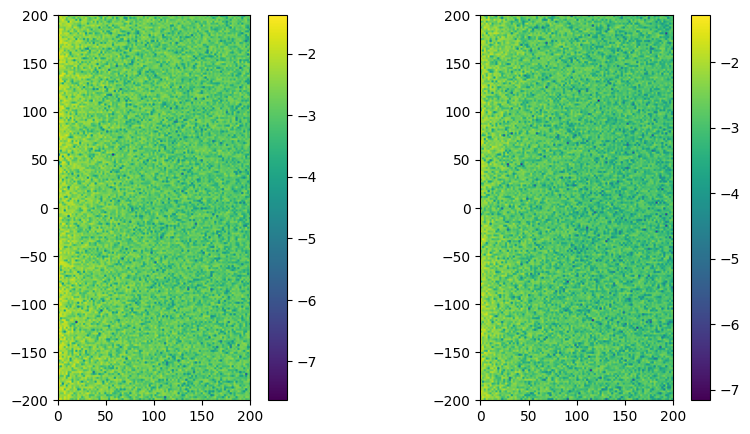

In [ ]:
plt.figure( figsize = ( 10 , 5 ))
plt.subplot(121)
plt.imshow( np.log10( np.abs( xi_gn_p_results ) ) , extent = [ 0 , 200 , -200 , 200 ] )
plt.colorbar()

plt.subplot(122)
plt.imshow( np.log10( np.abs( xi_gn_x_results ) ) , extent = [ 0 , 200 , -200 , 200 ] )
plt.colorbar()

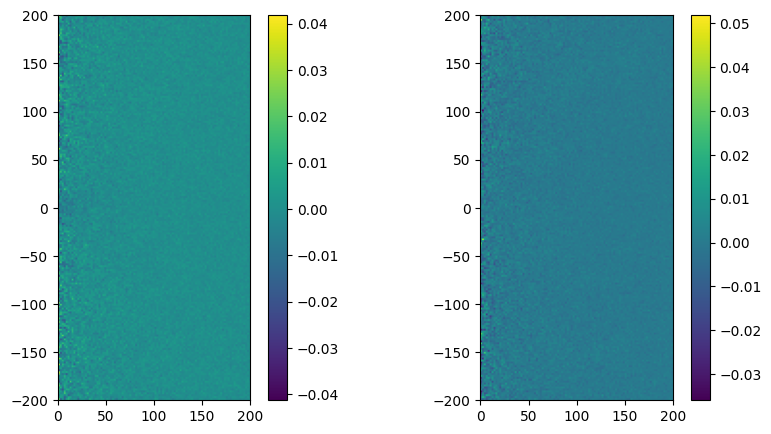

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(xi_gn_p_results, extent=[0, 200, -200, 200])
plt.colorbar()

plt.subplot(122)
plt.imshow(xi_gn_x_results, extent=[0, 200, -200, 200])
plt.colorbar()

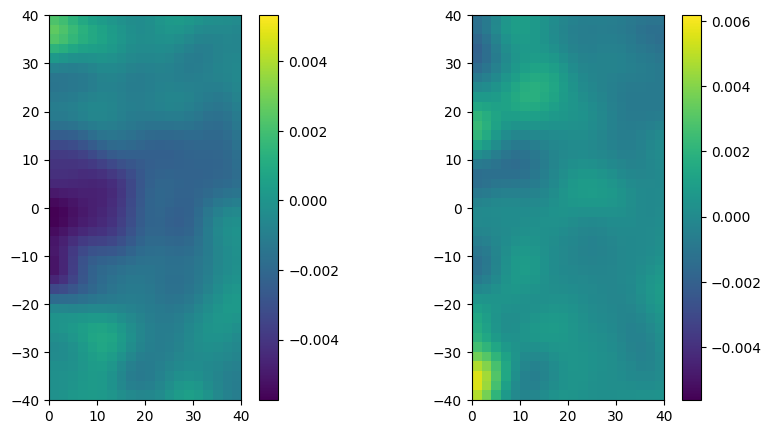

In [ ]:
from scipy.ndimage import gaussian_filter

sigma = 2

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(smoothed_xi_gn_p_results, extent=[0, 200, -200, 200])
plt.xlim(  0 , 40 )
plt.ylim( -40 , 40 )
plt.colorbar()

plt.subplot(122)
plt.imshow(smoothed_xi_gn_x_results, extent=[0, 200, -200, 200])
plt.xlim(  0 , 40 )
plt.ylim( -40 , 40 )
plt.colorbar()

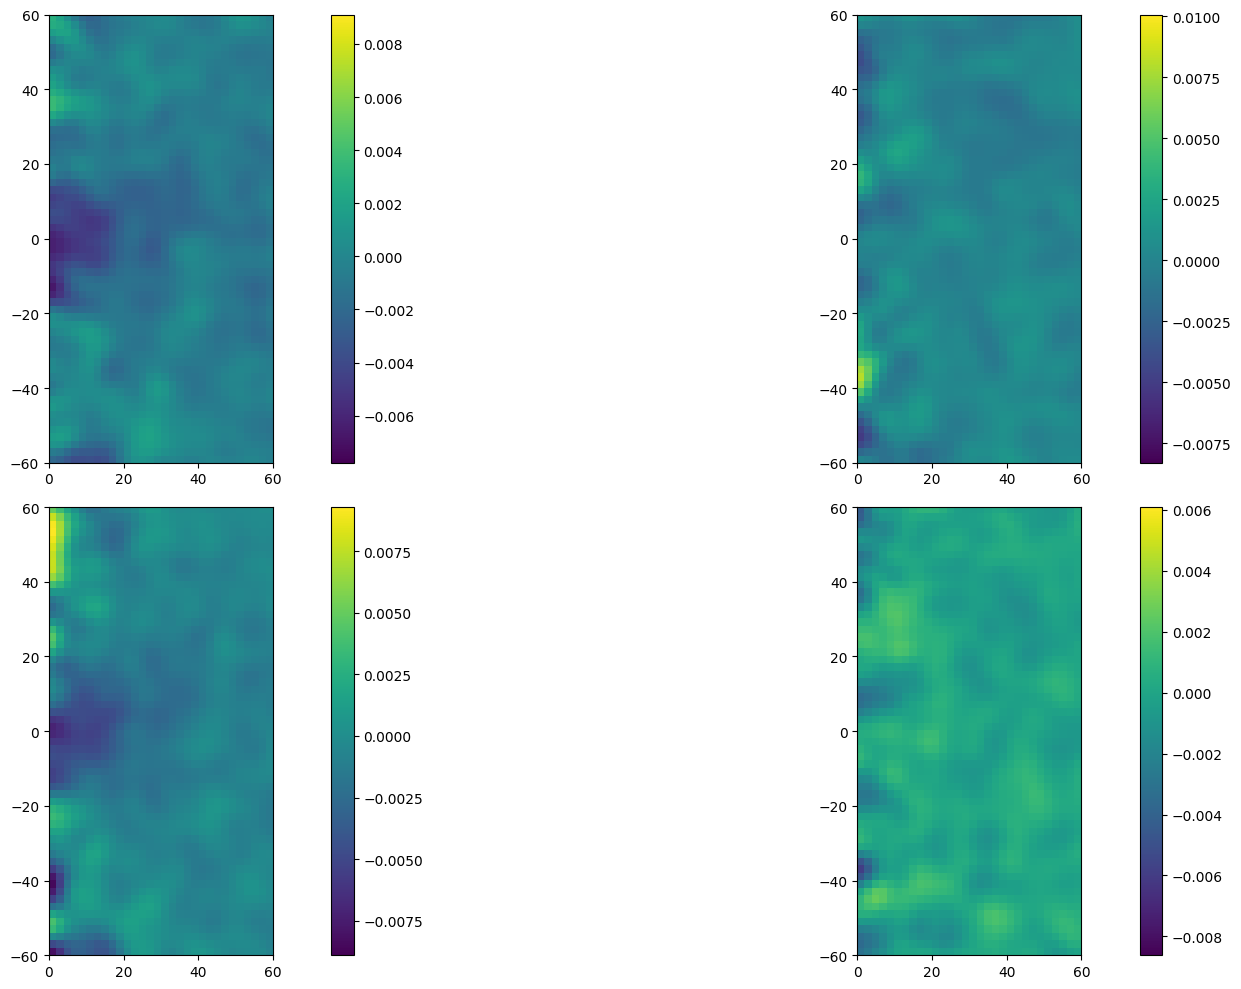

In [ ]:
from scipy.ndimage import gaussian_filter

sigma = 1.5

min_r = 60

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

# Apply Gaussian smoothing
smoothed_xi_gn_p_results_rec = gaussian_filter(xi_gn_p_results_rec, sigma= sigma )
smoothed_xi_gn_x_results_rec = gaussian_filter(xi_gn_x_results_rec, sigma= sigma )

plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.imshow(smoothed_xi_gn_p_results, extent=[0, 200, -200, 200])
plt.xlim(  0 , min_r )
plt.ylim( -min_r , min_r )
plt.colorbar()

plt.subplot(222)
plt.imshow(smoothed_xi_gn_x_results, extent=[0, 200, -200, 200])
plt.xlim(  0 , min_r )
plt.ylim( -min_r , min_r )
plt.colorbar()

plt.subplot(223)
plt.imshow(smoothed_xi_gn_p_results_rec, extent=[0, 200, -200, 200])
plt.xlim(  0 , min_r )
plt.ylim( -min_r , min_r )
plt.colorbar()

plt.subplot(224)
plt.imshow(smoothed_xi_gn_x_results_rec, extent=[0, 200, -200, 200])
plt.xlim(  0 , min_r )
plt.ylim( -min_r , min_r )
plt.colorbar()

plt.tight_layout()

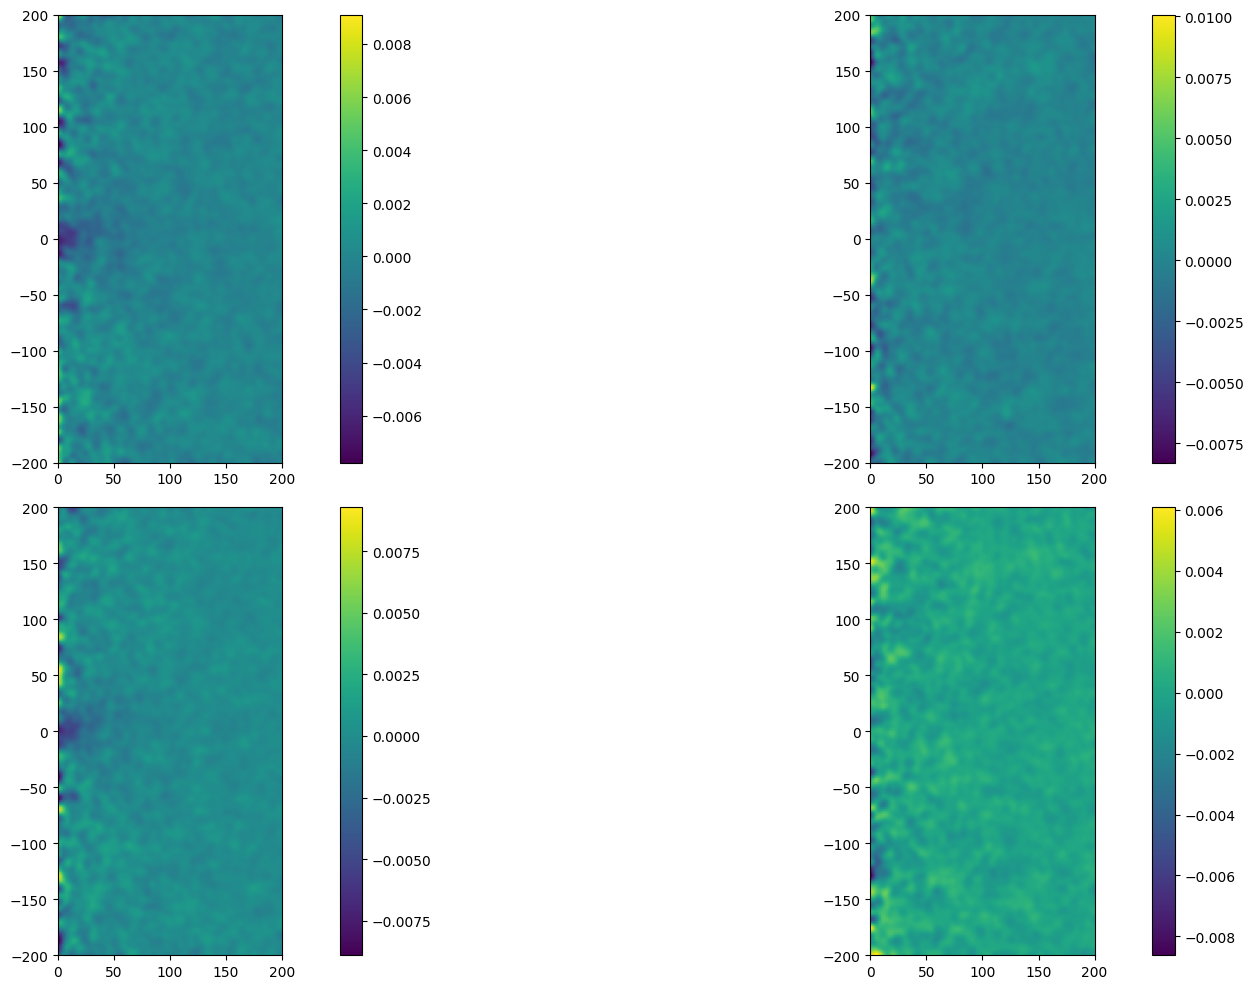

In [ ]:
from scipy.ndimage import gaussian_filter

sigma = 1.5

min_r = 200

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

# Apply Gaussian smoothing
smoothed_xi_gn_p_results_rec = gaussian_filter(xi_gn_p_results_rec, sigma= sigma )
smoothed_xi_gn_x_results_rec = gaussian_filter(xi_gn_x_results_rec, sigma= sigma )

plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.imshow(smoothed_xi_gn_p_results, extent=[0, 200, -200, 200])
plt.xlim(  0 , min_r )
plt.ylim( -min_r , min_r )
plt.colorbar()

plt.subplot(222)
plt.imshow(smoothed_xi_gn_x_results, extent=[0, 200, -200, 200])
plt.xlim(  0 , min_r )
plt.ylim( -min_r , min_r )
plt.colorbar()

plt.subplot(223)
plt.imshow(smoothed_xi_gn_p_results_rec, extent=[0, 200, -200, 200])
plt.xlim(  0 , min_r )
plt.ylim( -min_r , min_r )
plt.colorbar()

plt.subplot(224)
plt.imshow(smoothed_xi_gn_x_results_rec, extent=[0, 200, -200, 200])
plt.xlim(  0 , min_r )
plt.ylim( -min_r , min_r )
plt.colorbar()

plt.tight_layout()

In [ ]:
# Assuming r_perp_bins and r_par_bins are defined
r_perp_cents = r_results[0]
r_par_cents = ( rpar_bins[1:] + rpar_bins[:-1] )/2.

# Flatten the xi_results and r_results arrays
xi_gn_p_flat = np.array(xi_gn_p_results).flatten()
xi_gn_x_flat = np.array(xi_gn_x_results).flatten()

xi_gn_p_flat_rec = np.array(xi_gn_p_results_rec).flatten()
xi_gn_x_flat_rec = np.array(xi_gn_x_results_rec).flatten()



r_perp_flat = np.array([r_perp_cents] * len(r_par_cents)).flatten()
r_par_flat = np.array([[r_par] * len(r_perp_cents) for r_par in r_par_cents]).flatten()

In [ ]:
# Calculate s for each pair of (r_perp, r_par)
s = np.sqrt(r_perp_flat**2 + r_par_flat**2)

# Define bins for s
s_bins = np.linspace( 5 , 200 , 35 )
s_bins = np.logspace( np.log10( 5 ) , np.log10( 200 ) , 20 )
s_cents = ( s_bins[1:] + s_bins[:-1] )/2.

# Initialize arrays to store the results
xi_p_s = np.zeros(len(s_bins) - 1)
var_xi_p_s = np.zeros(len(s_bins) - 1)
counts_p = np.zeros(len(s_bins) - 1)

xi_x_s = np.zeros(len(s_bins) - 1)
var_xi_x_s = np.zeros(len(s_bins) - 1)
counts_x = np.zeros(len(s_bins) - 1)

xi_p_s_rec = np.zeros(len(s_bins) - 1)
var_xi_p_s_rec = np.zeros(len(s_bins) - 1)
counts_p_rec = np.zeros(len(s_bins) - 1)

xi_x_s_rec = np.zeros(len(s_bins) - 1)
var_xi_x_s_rec = np.zeros(len(s_bins) - 1)
counts_x_rec = np.zeros(len(s_bins) - 1)


# Bin the results by s and calculate the radial averages and variances
for i in range(len(s_bins) - 1):
    mask = (s >= s_bins[i]) & (s < s_bins[i + 1])
    if np.any(mask):  # Check if there are any elements in the mask
        xi_p_s[i] = np.mean(xi_gn_p_flat[mask])
        var_xi_p_s[i] = np.var(xi_gn_p_flat[mask])
        counts_p[i] = np.sum(mask)

        xi_x_s[i] = np.mean(xi_gn_x_flat[mask])
        var_xi_x_s[i] = np.var(xi_gn_x_flat[mask])
        counts_x[i] = np.sum(mask)

        xi_p_s_rec[i] = np.mean(xi_gn_p_flat_rec[mask])
        var_xi_p_s_rec[i] = np.var(xi_gn_p_flat_rec[mask])
        counts_p_rec[i] = np.sum(mask)

        xi_x_s_rec[i] = np.mean(xi_gn_x_flat_rec[mask])
        var_xi_x_s_rec[i] = np.var(xi_gn_x_flat_rec[mask])
        counts_x_rec[i] = np.sum(mask)

# Handle cases where there are no counts in a bin
xi_p_s[counts_p == 0] = np.nan
var_xi_p_s[counts_p == 0] = np.nan

xi_x_s[counts_x == 0] = np.nan
var_xi_x_s[counts_x == 0] = np.nan

xi_p_s_rec[counts_p == 0] = np.nan
var_xi_p_s_rec[counts_p == 0] = np.nan

xi_x_s_rec[counts_x == 0] = np.nan
var_xi_x_s_rec[counts_x == 0] = np.nan

In [ ]:
h =0.7

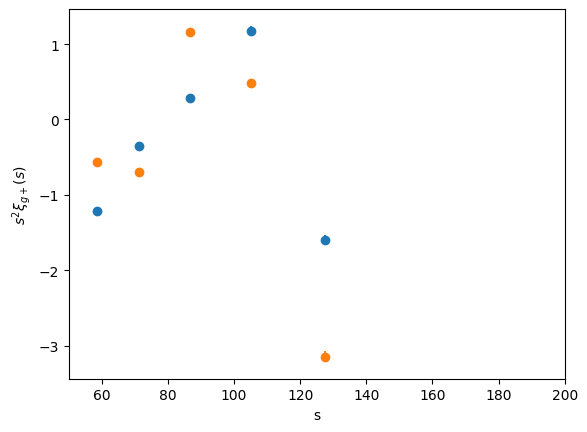

In [ ]:
plt.errorbar( s_cents * h , xi_p_s * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5/20 )
plt.errorbar( s_cents * h , xi_p_s_rec * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5/20 )
plt.xlabel('s')
plt.ylabel(r'$s^2 \xi_{g+}(s)$')
plt.xlim( 50 , 200 )
#plt.ylim( -10 , 20 )
#plt.ylim( -0.01 , 0.03 * 100**2 )
plt.show()

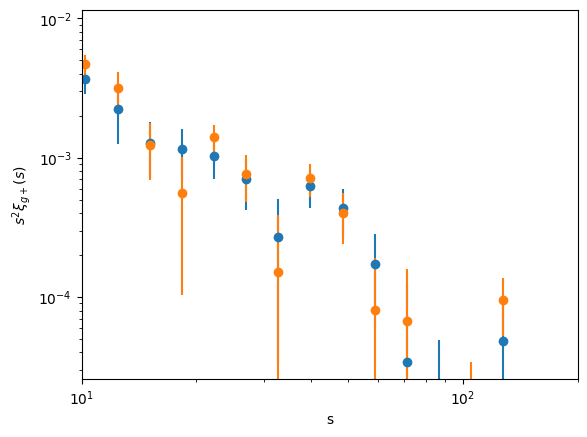

In [ ]:
plt.errorbar( s_cents * h , -xi_p_s, fmt='o' , yerr = var_xi_p_s**0.5  / counts_x**0.5 )
plt.errorbar( s_cents * h , -xi_p_s_rec, fmt='o' , yerr = var_xi_p_s**0.5  / counts_x**0.5 )
plt.xlabel('s')
plt.ylabel(r'$s^2 \xi_{g+}(s)$')
plt.xlim( 10 , 200 )
#plt.ylim( -10 , 20 )
#plt.ylim( -0.01 , 0.03 * 100**2 )
plt.xscale('log')
plt.yscale('log')

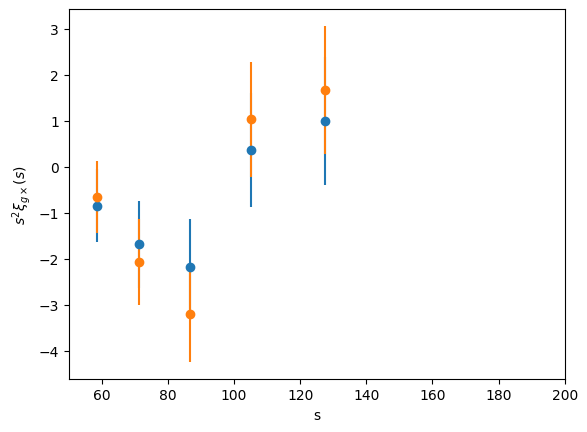

In [ ]:
plt.errorbar( s_cents * h , xi_x_s * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.errorbar( s_cents * h , xi_x_s_rec * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.xlabel('s')
plt.ylabel(r'$s^2 \xi_{g\times}(s)$')
plt.xlim( 50 , 200 )
#plt.ylim( -10 , 20 )
#plt.ylim( -0.01 , 0.03 * 100**2 )
plt.show()

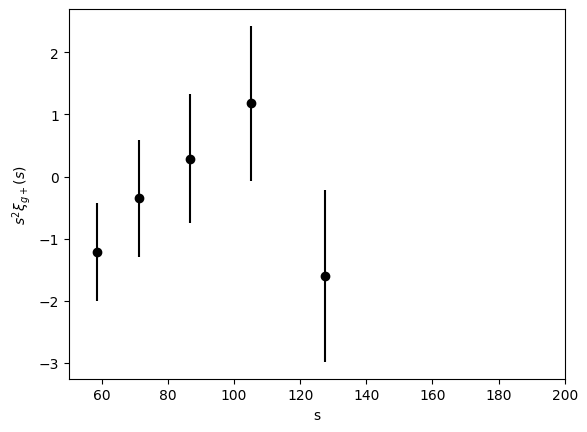

In [ ]:
plt.errorbar( s_cents * h , xi_p_s * s_cents**2, fmt='ko' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
# plt.errorbar( s_cents , -xi_x_s * s_cents**2, fmt='o' , yerr = var_xi_x_s**0.5  * s_cents**2 / counts_p**0.5 )
#plt.errorbar( s_cents * h , -sticks_xi_p_s * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.xlabel('s')
plt.ylabel(r'$s^2 \xi_{g+}(s)$')
plt.xlim( 50 , 200 )
#plt.ylim( -10 , 20 )
#plt.ylim( -0.01 , 0.03 * 100**2 )
plt.show()

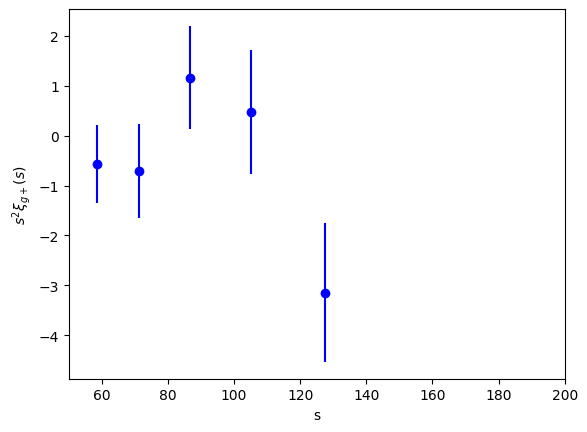

In [ ]:
plt.errorbar( s_cents * h , xi_p_s_rec * s_cents**2, fmt='bo' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
# plt.errorbar( s_cents , -xi_x_s * s_cents**2, fmt='o' , yerr = var_xi_x_s**0.5  * s_cents**2 / counts_p**0.5 )
#plt.errorbar( s_cents * h , -sticks_xi_p_s * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.xlabel('s')
plt.ylabel(r'$s^2 \xi_{g+}(s)$')
plt.xlim( 50 , 200 )
#plt.ylim( -10 , 20 )
#plt.ylim( -0.01 , 0.03 * 100**2 )
plt.show()

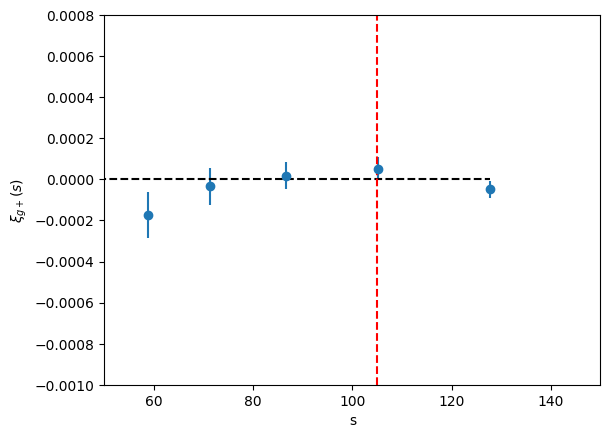

In [ ]:
plt.errorbar(s_cents * h, xi_p_s, fmt='o', yerr=var_xi_p_s**0.5 / counts_x**0.5 )
# plt.errorbar(s_cents, xi_s, fmt='o', yerr=var_xi_s**0.5 / counts**0.5, label='Xi_s(s)')
# plt.errorbar(s_cents, -xi_x_s, fmt='o', yerr=var_xi_x_s**0.5 / counts_p**0.5, label='Xi_x(s)')
plt.plot(s_cents * h, np.zeros(s_cents.shape), 'k--' )
plt.axvline(x=150 * h, color='r', linestyle='--', label='BAO scale')
plt.xlabel('s')
plt.ylabel(r'$\xi_{g+}(s)$')
plt.xlim( 50 , 150 )
plt.ylim( -0.002, 0.0008 )
# plt.yscale('log')
plt.ylim( -0.001, 0.0008 )
#plt.legend()
plt.show()

In [84]:
# Shear stuff
# Function to process a single rpar bin
def process_gg_rpar_bin( shape_catalogue , min_rpar, max_rpar , min_sep = min_sep, max_sep = max_sep, nbins = nbins):
    print('Running between rpar =', min_rpar, 'and rpar =', max_rpar)

    # Create the NNCorrelation objects
    gg = treecorr.GGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, min_rpar=min_rpar, max_rpar=max_rpar, bin_type='Linear') 

    # Process the position and random catalogues
    gg.process(shape_catalogue, shape_catalogue, metric='Rperp')

    xip = gg.xip
    xim = gg.xim
    r = np.exp(gg.meanlogr)

    return r , xip , xim

In [350]:
# Define the range and number of bins for rpar
rpar_bins = np.linspace(-200, 200, 201 )  

# Define the parameters for the correlation function
min_sep = 0.5  # Minimum separation in Mpc
max_sep = 200  # Maximum separation in Mpc
nbins = 100     # Number of bins
bin_slop = 0.1 # Bin slop

In [351]:
# Initialize lists to store results
xi_gg_p_results = []
xi_gg_m_results = []
r_results = []

# Iterate over rpar bins
for i in range(len(rpar_bins) - 1):

    min_rpar = rpar_bins[i]
    max_rpar = rpar_bins[i + 1]

    r , xi_p , xi_m = process_gg_rpar_bin( shape_catalogue , min_rpar, max_rpar , min_sep , max_sep , nbins )

    # Store the results
    xi_gg_p_results.append( xi_p )
    xi_gg_m_results.append( xi_m )
    r_results.append(r)

In [352]:
plt.figure( figsize = ( 10 , 5 ))
plt.subplot(121)
plt.imshow( ( xi_gg_p_results ) )
plt.colorbar()

plt.subplot(122)
plt.imshow( ( xi_gg_m_results ) )
plt.colorbar()

In [355]:
sigma = 2

# Apply Gaussian smoothing
smoothed_xi_gg_p_results = gaussian_filter(xi_gg_p_results, sigma= sigma )
smoothed_xi_gg_m_results = gaussian_filter(xi_gg_m_results, sigma= sigma )

image_lim = 100

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(smoothed_xi_gg_p_results, extent=[0, 200, -200, 200])
plt.xlim(  0 ,image_lim )
plt.ylim( -image_lim ,image_lim )
plt.colorbar()

plt.subplot(122)
plt.imshow(smoothed_xi_gg_m_results, extent=[0, 200, -200, 200])
plt.xlim(  0 ,image_lim )
plt.ylim( -image_lim ,image_lim )
plt.colorbar()

In [361]:
# Flatten the xi_gg_p_results and xi_gg_m_results arrays
xi_gg_p_flat = np.array(xi_gg_p_results).flatten()
xi_gg_m_flat = np.array(xi_gg_m_results).flatten()

# Calculate s for each pair of (r_perp, r_par)
s = np.sqrt(r_perp_flat**2 + r_par_flat**2)

# Define bins for s
s_bins = np.linspace(5, 250, 20)
s_cents = (s_bins[1:] + s_bins[:-1]) / 2.

# Initialize arrays to store the results
xi_gg_p_s = np.zeros(len(s_bins) - 1)
var_xi_gg_p_s = np.zeros(len(s_bins) - 1)
counts_p = np.zeros(len(s_bins) - 1)

xi_gg_m_s = np.zeros(len(s_bins) - 1)
var_xi_gg_m_s = np.zeros(len(s_bins) - 1)
counts_m = np.zeros(len(s_bins) - 1)

# Bin the results by s and calculate the radial averages and variances
for i in range(len(s_bins) - 1):
    mask = (s >= s_bins[i]) & (s < s_bins[i + 1])
    if np.any(mask):  # Check if there are any elements in the mask
        xi_gg_p_s[i] = np.mean(xi_gg_p_flat[mask])
        var_xi_gg_p_s[i] = np.var(xi_gg_p_flat[mask])
        counts_p[i] = np.sum(mask)

        xi_gg_m_s[i] = np.mean(xi_gg_m_flat[mask])
        var_xi_gg_m_s[i] = np.var(xi_gg_m_flat[mask])
        counts_m[i] = np.sum(mask)

# Handle cases where there are no counts in a bin
xi_gg_p_s[counts_p == 0] = np.nan
var_xi_gg_p_s[counts_p == 0] = np.nan

xi_gg_m_s[counts_m == 0] = np.nan
var_xi_gg_m_s[counts_m == 0] = np.nan


In [362]:
plt.errorbar( s_cents * h , xi_gg_m_s, fmt='o' , yerr = var_xi_gg_m_s**0.5 / counts_m**0.5 )
# plt.errorbar( s_cents , xi_s , fmt='o' , yerr = var_xi_s**0.5 / counts**0.5 )
# plt.errorbar( s_cents * h , xi_gg_p_s, fmt='o' , yerr = var_xi_gg_p_s**0.5 / counts_p**0.5 )

#plt.errorbar( s_cents , -xi_x_s, fmt='o' , yerr = var_xi_x_s**0.5 / counts_p**0.5 )
plt.plot( s_cents *h , np.zeros( s_cents.shape ) , 'k--')
plt.xlabel('s')
plt.ylabel('Xi(s)')
plt.title('Radial Averages of Xi(s)')
#plt.xlim( 5 * h , 250 * h )
plt.ylim( -0.0001 , 0.0001 ) 
#plt.yscale('log')
plt.show()

In [363]:
plt.errorbar( s_cents * h , xi_gg_p_s, fmt='o' , yerr = var_xi_gg_m_s**0.5 / counts_m**0.5 )
# plt.errorbar( s_cents , xi_s , fmt='o' , yerr = var_xi_s**0.5 / counts**0.5 )
# plt.errorbar( s_cents * h , xi_gg_p_s, fmt='o' , yerr = var_xi_gg_p_s**0.5 / counts_p**0.5 )

#plt.errorbar( s_cents , -xi_x_s, fmt='o' , yerr = var_xi_x_s**0.5 / counts_p**0.5 )
plt.plot( s_cents *h , np.zeros( s_cents.shape ) , 'k--')
plt.xlabel('s')
plt.ylabel('Xi(s)')
plt.title('Radial Averages of Xi(s)')
#plt.xlim( 5 * h , 250 * h )
plt.ylim( -0.0001 , 0.0001 ) 
#plt.yscale('log')
plt.show()

In [ ]:
# Create the NNCorrelation objects
ng = treecorr.NGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, min_rpar=min_rpar, max_rpar=max_rpar) 
rg = treecorr.NGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, min_rpar=min_rpar, max_rpar=max_rpar) 

In [ ]:
# Process the position and random catalogues
ng.process( position_catalogue , shape_catalogue , metric ='Rperp' )
rg.process( random_position_catalogue , shape_catalogue, metric ='Rperp' )

In [ ]:
xi_p = ng.raw_xi
xim_p = ng.xi_im 

In [ ]:
# Plot the correlation function
plt.figure(figsize=(8, 6))
plt.plot(r, xi_p, label=r'$\Xi(s)$')
plt.plot(r, xim_p, label=r'$\Xi(s)$')
plt.xscale('log')
plt.xlabel('Separation (Mpc)')
plt.ylabel(r'$\Xi(s)$')
plt.title('Landy-Szalay Correlation Function $\Xi(s)$')
plt.legend()
plt.show()

In [38]:
from ia_corr import compute_2p_corr

In [ ]:
# parameters related with bins
nbins = 10 # number of radial bins
rmin = 0.1 # minimum value for rp (r in case of the quadrupole)
rmax = 200. # maximum value for rp (r in case of the quadrupole)
pi_max = 15. # maximum value along l.o.s. (Pi) 
npi = 5 # number of bins in Pi
mubins = 10 # number of bins in mu
grid_resolution = 10 # Controls the resolution of the r,mu grid to compute the quadrupole, 
#you can lower this value for a faster computation but it's going to compute wgp2 only at larger radius

# Related to JK patches
NPatches = 15 #int(nbins**(3./2.))
print('Number of patches',NPatches)
# Other configuration parameters
ncores = 30 # Number of cores to run in parallel
slop = 0.1 # Resolution for treecorr
box = False # Indicates if the data corresponds to a box, otherwise it will assume a lightcone
exact_position = False # Indicates if the coordinates are exactly provided (e.g. simulated data 
# without any error added in the position). Otherwise it will assume that the positions are not
# exact and will use ra, dec to match the catalogues. If this parameter is set as True, it
# will neglect box and it will set it as False
sky_threshold = 1.0 # Threshold for matching the catalogues in arcsecond, used if exact_position
#is set to True.
grid_resolution = 10 # Resolution of the grid used to compute the quadrupole, a lower number will
#speed up the computation but reaches to larger radial distances.

In [ ]:
col_names = ['RA','DEC','d','e1','e2', 'w']

config = {'col_names': col_names,
          'nbins': nbins,
          'rmin': rmin,
          'rmax': rmax,
          'pi_max': pi_max,
          'npi': npi,
          'grid_resolution': grid_resolution,
          'mubins': mubins,
          'NPatches': NPatches,
          'ncores': ncores,
          'slop': slop,
          'box': box,
          'exact_position': exact_position,
          'sky_threshold': sky_threshold,
          'grid_resolution': grid_resolution
         }

In [ ]:
corr = compute_2p_corr(positions,shapes,random_positions,random_shapes,config)


In [ ]:
corr.compute_wgg()

In [ ]:
plt.errorbar(corr.wgg.rp,corr.wgg.xip,yerr=corr.wgg.std_from_cov,label=r'$w_{gg}[Mpc/h]²$',c='lightcoral')
# plt.errorbar(corr.wgp.rp,corr.wgp.xip,yerr=corr.wgp.std_from_cov,label=r'$w_{g+}[Mpc/h]²$',c='C3')
# plt.errorbar(corr.wgp2.r,corr.wgp2.xip,yerr=corr.wgp2.std_from_cov,label=r'$w_{g+,2}[Mpc/h]²$',c='brown')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$w[Mpc/h]²$',fontsize=14)
plt.xlabel(r'$r(_p) [Mpc/h]$',fontsize=14)
plt.legend(frameon=False)

In [ ]:
corr.compute_wgp()

In [ ]:
# plt.errorbar(corr.wgg.rp,
#              corr.wgg.xip,yerr=corr.wgg.std_from_cov,label=r'$w_{gg}[Mpc/h]²$',c='lightcoral')
plt.errorbar( corr.wgp.rp,
              -corr.wgp.xip,
              yerr=corr.wgp.std_from_cov,label=r'$w_{g+}[Mpc/h]²$',c='C3')
plt.errorbar( corr.wgp.rp,
              corr.wgx.xip,
              yerr=corr.wgx.std_from_cov,label=r'$w_{gx}[Mpc/h]²$',c='b')
# plt.errorbar(corr.wgp.rp,-corr.wgp.xip,yerr=corr.wgp.std_from_cov,label=r'$w_{g+}[Mpc/h]²$',c='C3')
# plt.errorbar(corr.wgp2.r,corr.wgp2.xip,yerr=corr.wgp2.std_from_cov,label=r'$w_{g+,2}[Mpc/h]²$',c='brown')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$w[Mpc/h]²$',fontsize=14)
plt.xlabel(r'$r(_p) [Mpc/h]$',fontsize=14)
plt.legend(frameon=False)

In [ ]:
plt.errorbar(corr.wgp.rp,corr.wgx.xip,yerr=corr.wgp.std_from_cov,label=r'$w_{gx}[Mpc/h]²$',c='C0')
plt.errorbar( corr.wgp.rp,
              -corr.wgp.xip,
              yerr=corr.wgp.std_from_cov,label=r'$w_{g+}[Mpc/h]²$',c='C3')
plt.plot(corr.wgp.rp,corr.wgp.rp*0.,'C7--')
plt.xscale('log')
plt.ylabel(r'$w_\times[Mpc/h]²$',fontsize=14)
plt.xlabel(r'$r(_p) [Mpc/h]$',fontsize=14)
plt.legend(frameon=False)

In [ ]:
# Prepare the data for TreeCorr
# shape_catalogue = treecorr.Catalog( ra=matched_shape_ra, 
#                                     dec=matched_shape_dec,
#                                     g1=matched_shape_e1, 
#                                     g2=matched_shape_e2 , 
#                                     w = matched_shape_w , 
#                                     r = r_shapes ,
#                                     ra_units='deg', dec_units='deg')


# position_catalogue = treecorr.Catalog( ra = galaxy_sample['RA'],
#                                        dec = galaxy_sample['DEC'] , 
#                                        r = r_positions , 
#                                        w = galaxy_sample['WEIGHT_ALL_NOFKP'] , 
#                                        ra_units='deg', 
#                                        dec_units='deg' )

shape_catalogue = treecorr.Catalog( ra=matched_shape_ra, 
                                    dec=matched_shape_dec,
                                    g1=matched_shape_e1, 
                                    g2=matched_shape_e2 , 
                                    w = matched_shape_w , 
                                    #r = r_shapes ,
                                    ra_units='deg', dec_units='deg')


position_catalogue = treecorr.Catalog( ra = galaxy_sample['RA'],
                                       dec = galaxy_sample['DEC'] , 
                                       #r = r_positions , 
                                       w = galaxy_sample['WEIGHT_ALL_NOFKP'] , 
                                       ra_units='deg', 
                                       dec_units='deg' )

In [ ]:
max_rpar = 20

In [ ]:
#gg = treecorr.GGCorrelation( nbins=20, min_sep=0.1, max_sep=100, max_rpar=max_rpar)
gg = treecorr.GGCorrelation( nbins=20, min_sep=0.1, max_sep=100,sep_units='arcmin' )

gg.process( shape_catalogue )

xip = gg.xip  # The xi_plus correlation function
xim = gg.xim  # The xi_minus correlation function

In [ ]:
galaxy_redshift_cut = ( galaxy_sample['Z'] > 0.6 )  &  ( galaxy_sample['Z'] < 0.65 )
shape_redshift_cut = ( matched_galaxy_redshift > 0.6 )  &  ( matched_galaxy_redshift < 0.65 )

In [ ]:
len( matched_shape_ra[shape_redshift_cut] ), len( galaxy_sample['RA'][galaxy_redshift_cut] )

In [ ]:
shape_catalogue = treecorr.Catalog( ra=matched_shape_ra[shape_redshift_cut], 
                                    dec=matched_shape_dec[shape_redshift_cut],
                                    g1=matched_shape_e1[shape_redshift_cut], 
                                    g2=matched_shape_e2[shape_redshift_cut] , 
                                    w = matched_shape_w[shape_redshift_cut] , 
                                    #r = r_shapes ,
                                    ra_units='deg', dec_units='deg')


position_catalogue = treecorr.Catalog( ra = galaxy_sample['RA'][galaxy_redshift_cut],
                                       dec = galaxy_sample['DEC'][galaxy_redshift_cut] , 
                                       #r = r_positions , 
                                       w = galaxy_sample['WEIGHT_ALL_NOFKP'][galaxy_redshift_cut] , 
                                       ra_units='deg', 
                                       dec_units='deg' )

In [ ]:
nn = treecorr.NNCorrelation( min_sep=.1, max_sep=60., bin_size=0.1, sep_units='degrees'  )

nn.process( position_catalogue , position_catalogue )
print(nn.__dict__.keys())

In [ ]:
rand = treecorr.Catalog(ra=random_positions[ra], dec=random_positions[dec], ra_units='degrees', dec_units='degrees')
rr = treecorr.NNCorrelation( min_sep=.1, max_sep=60., bin_size=0.1, sep_units='degrees')
rr.process(rand)


In [ ]:
dr = treecorr.NNCorrelation( min_sep=.1, max_sep=60., bin_size=0.1, sep_units='degrees' )
dr.process( position_catalogue , rand)

In [ ]:


xi, varxi = nn.calculateXi(rr=rr, dr=dr)
sig = np.sqrt(varxi)

In [ ]:

r = np.exp(nn.meanlogr)
sig = np.sqrt(varxi)

plt.plot(r, xi, color='blue')
plt.plot(r, -xi, color='blue', ls=':')
plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='blue', lw=0.1, ls='')
plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='blue', lw=0.1, ls='')
leg = plt.errorbar(-r, xi, yerr=sig, color='blue')

plt.xscale('log')
plt.yscale('log', nonpositive='clip')
plt.xlabel(r'$\theta$ (degrees)')

plt.legend([leg], [r'$w(\theta)$'], loc='lower left')
# plt.xlim([0.01,10])
plt.show()



In [ ]:
ng = treecorr.NGCorrelation( min_sep=.01, max_sep=60., bin_size=0.4, sep_units='degrees' )


ng.process( position_catalogue , shape_catalogue )

ng_xip = ng.xi  # The xi_plus correlation function
ng_xim = ng.xi_im  # The xi_minus correlation function
ngr = np.exp( ng.meanlogr )


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot( ngr , -ng_xip )
plt.plot( ngr ,  ng_xim )
plt.plot( ngr , ng_xip , '--' )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Separation (Mpc/h)')
plt.ylabel('xi_plus')
plt.title('Shear-Shear Correlation Function (xi_plus)')
plt.grid(True)
plt.show()

In [ ]:
data = []
# Define redshift bins
#redshift_bins = [(0.6, 0.65), (0.65, 0.7), (0.7, 0.75), (0.75, 0.8), (0.8, 0.85), (0.9, 0.95), (0.95, 1)]
dz = 0.03
redshift_bins = [(z, z + dz) for z in np.arange(0.6, 1, dz)]

# Loop over redshift bins
for z_min, z_max in redshift_bins:
    galaxy_redshift_cut = (galaxy_sample['Z'] > z_min) & (galaxy_sample['Z'] < z_max)
    shape_redshift_cut = (matched_galaxy_redshift > z_min) & (matched_galaxy_redshift < z_max)

    rgalaxy_redshift_cut = (random_positions[redshift] > z_min) & ( random_positions[redshift]  < z_max)
    rshape_redshift_cut = (random_shapes[redshift] > z_min) & ( random_shapes[redshift]  < z_max)

    shape_catalogue = treecorr.Catalog(
        ra=matched_shape_ra[shape_redshift_cut],
        dec=matched_shape_dec[shape_redshift_cut],
        g1=matched_shape_e1[shape_redshift_cut],
        g2=matched_shape_e2[shape_redshift_cut],
        w=matched_shape_w[shape_redshift_cut],
        ra_units='deg',
        dec_units='deg'
    )

    position_catalogue = treecorr.Catalog(
        ra=galaxy_sample['RA'][galaxy_redshift_cut],
        dec=galaxy_sample['DEC'][galaxy_redshift_cut],
        w=galaxy_sample['WEIGHT_ALL_NOFKP'][galaxy_redshift_cut],
        ra_units='deg',
        dec_units='deg'
    )

    random_position_catalogue = treecorr.Catalog(
        ra=random_positions[ra][rgalaxy_redshift_cut],
        dec=random_positions[dec][rgalaxy_redshift_cut],
        ra_units='deg',
        dec_units='deg'
    )

    random_shape_catalogue = treecorr.Catalog(
        ra=random_shapes[ra][rshape_redshift_cut],
        dec=random_shapes[dec][rshape_redshift_cut],
        ra_units='deg',
        dec_units='deg'
    )

    ng = treecorr.NGCorrelation(min_sep=.01, max_sep=600., bin_size=0.35, sep_units='degrees')
    rg = treecorr.NGCorrelation(min_sep=.01, max_sep=600., bin_size=0.35, sep_units='degrees')
    #rr = treecorr.NNCorrelation(min_sep=.001, max_sep=600., bin_size=0.15, sep_units='degrees')

    ng.process(position_catalogue, shape_catalogue)
    rg.process(random_position_catalogue, shape_catalogue)
    #rr.process(random_position_catalogue, random_shape_catalogue)

    ng_xip =  ng.xi - rg.xi
    ng_xim = ng.xi_im - rg.xi_im  # The xi_minus correlation function
    varxi = ng.varxi  # The variance of the correlation function
    ngr = np.exp(ng.meanlogr)

    print( len( ngr ), len( ng_xip ), len( ng_xim ), len( varxi ) )

    data.append( [ngr, ng_xip, ng_xim, varxi] )

In [ ]:
len( data )

In [ ]:
data = np.array( data )

In [ ]:
data[:, 3][ data[:, 3] == 0] = 1e-10

In [ ]:
# Calculate the weighted mean
weighted_mean = np.average(data[:, 1], axis=0, weights=1/data[:, 3])
weighted_mean_im = np.average(data[:, 2], axis=0, weights=1/data[:, 3])

# Calculate the weighted variance
weighted_variance = np.average(data[:, 3], axis=0, weights=1/data[:, 3])

# Calculate the weighted standard deviation (error)
weighted_err = (weighted_variance)**0.5

# Plot the results
plt.figure(figsize=(8, 6))
plt.errorbar(ngr, -weighted_mean, yerr=weighted_err, fmt='--')
plt.errorbar(ngr, -weighted_mean_im, yerr=weighted_err, fmt='--')
#plt.errorbar(ngr, weighted_mean, yerr=weighted_err, fmt='--')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Separation (degrees)')
plt.ylabel('xi_plus')
plt.title('Weighted Mean and Error of xi_plus')
plt.grid(True)
plt.show()